In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score


/var/folders/6d/fmq5z4yj0r31lwc7tclbdlg80000gn/T/ipykernel_92049/1087863793.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
/var/folders/6d/fmq5z4yj0r31lwc7tclbdlg80000gn/T/ipykernel_92049/1087863793.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
/var/folders/6d/fmq5z4yj0r31lwc7tclbdlg80000gn/T/ipykernel_92049/1087863793.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

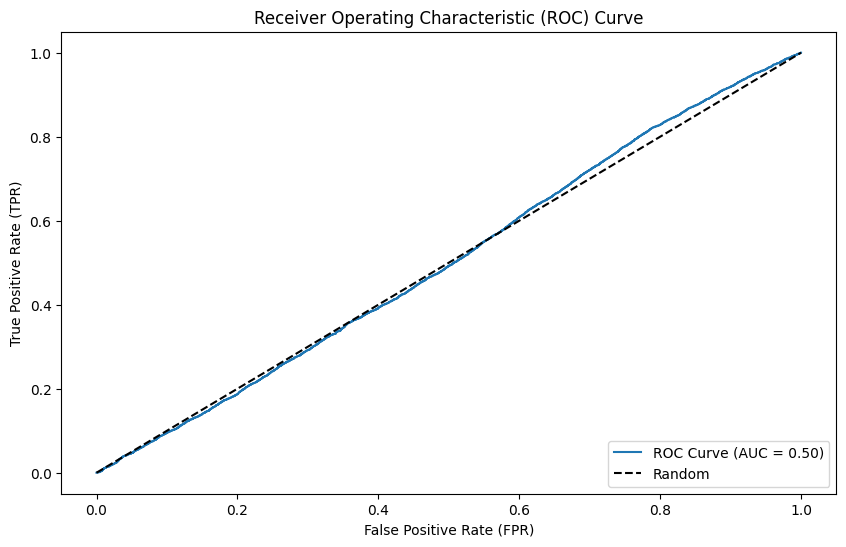

In [21]:
df = pd.read_csv('/Users/meghnagopalan/Downloads/kaggle-code/train.csv')

X = df[['auctionId', 'timeStamp', 'placementId', 'websiteId', 'country', 'browser',
        'browserVersion', 'device', 'environmentType', 'integrationType',
        'articleSafenessCategorization']]
y = df['isSold']

# Convert any non-numeric columns to categorical codes
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the probabilities of positive class (isSold=True) for test data
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
